# Working with Series

In [1]:
import pandas as pd

Table of Contents:

- [Exploring a Series](#1.-Exploring-a-Series)
- [Working with dates and times in pandas](#2.-Working-with-dates-and-times-in-pandas)
- [Using string methods in pandas](#3.-Using-string-methods-in-pandas)

## 1. Exploring a Series

- [Exploring a non-numeric Series](#1.1.-Exploring-a-non-numeric-Series)
- [Exploring a numeric Series](#1.2.-Exploring-a-numeric-Series)

In [2]:
# load the 'imdb_1000 dataframe'
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv'
movies = pd.read_csv(url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [3]:
# examine the data type of each Series
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

### 1.1. Exploring a non-numeric Series

In [4]:
# count the non-NaN values, unique values, and frequency of the most common value
movies.content_rating.describe()

count     976
unique     12
top         R
freq      460
Name: content_rating, dtype: object

In [5]:
# display the unique values in the content_rating column
movies.content_rating.unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [6]:
# number of unique elements
movies.content_rating.nunique()

12

In [7]:
# count how many times each value in the content_rating occurs
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [8]:
# display percentages instead of raw counts
movies.content_rating.value_counts(normalize=True)

R            0.471311
PG-13        0.193648
PG           0.126025
NOT RATED    0.066598
APPROVED     0.048156
UNRATED      0.038934
G            0.032787
PASSED       0.007172
NC-17        0.007172
X            0.004098
GP           0.003074
TV-MA        0.001025
Name: content_rating, dtype: float64

In [9]:
# 'value_counts' (like many pandas methods) outputs a Series; thus, you can add another Series method on the end
movies.content_rating.value_counts().head(3)

R        460
PG-13    189
PG       123
Name: content_rating, dtype: int64

<AxesSubplot:>

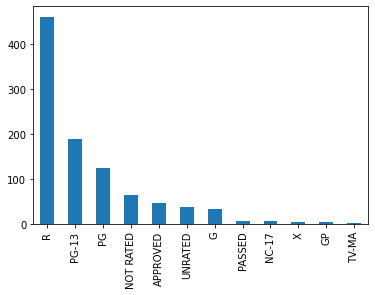

In [10]:
# bar plot of the 'value_counts' for the 'content_rating' Series
movies.content_rating.value_counts().plot.bar()

<AxesSubplot:>

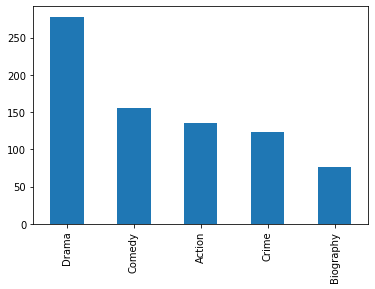

In [11]:
movies.genre.value_counts().head(5).plot.bar()

In [12]:
# explore multiple columns at once
movies[['content_rating','genre']].describe()

,content_rating,genre
count,976,979
unique,12,16
top,R,Drama
freq,460,278


### 1.2. Exploring a numeric Series

In [13]:
# calculate various summary statistics
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [14]:
# many statistics are implemented as Series method
movies.duration.mean() # mean duration

120.97957099080695

In [15]:
movies.duration.max() # maximum

242

In [16]:
movies.duration.std() #standard deviation

26.218009846412112

In [17]:
movies.duration.sum()

118439

<AxesSubplot:ylabel='Frequency'>

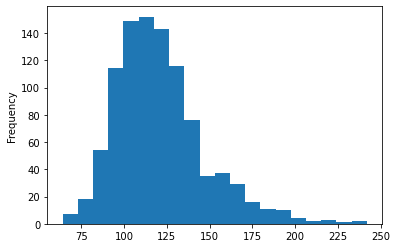

In [18]:
# histogram of the 'duration' Series (shows the distribution of a numerical variable)
movies.duration.plot.hist(bins=20)

<AxesSubplot:ylabel='Density'>

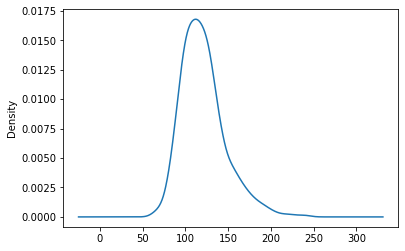

In [19]:
# probability distribution
movies.duration.plot.density()

In [20]:
# calculate multiple statistics
movies.duration.agg(['max','min','std'])

max    242.00000
min     64.00000
std     26.21801
Name: duration, dtype: float64

In [21]:
movies[['duration','star_rating']].agg(['max','min','std'])

,duration,star_rating
max,242.00000,9.300000
min,64.00000,7.400000
std,26.21801,0.336069


List of Pandas aggregation methods:

| method      | description |
| ----------- | ----------- |
| `size()`, `count()` | number of rows and non-NAN rows |
| `first()`, `last()`, `nth()` | first, last and nth item |
| `mean()`, `median()` | mean and median values |
| `quantile()` | quantile value |
| `min()`, `max()` | minimum and maximum values |
| `std()`, `var()`, `mad()` | standard deviation, variance, and mean absolute deviation |
| `sum()`, `prod()` | sum and product of all items |

You can write custom aggregation functions

In [22]:
# this function computes the difference between the max and the min values in a column
def gap(column):
    return column.max()-column.min()

In [24]:
movies[['duration','star_rating']].agg(['max','min',gap])

,duration,star_rating
max,242,9.3
min,64,7.4
gap,178,1.9


## 2. Working with dates and times in pandas

The ufo.csv dataset contains reports of UFO sightings from 1930 to 2000.

In [22]:
# read the UFO data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/ufo.csv'
ufo = pd.read_csv(url)

In [23]:
# 'Time' is currently stored as a string
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [24]:
ufo.Time[0] # returns a string

'6/1/1930 22:00'

In [25]:
# convert 'Time' to datetime format
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [26]:
ufo.Time[0] # returns a Timestamp

Timestamp('1930-06-01 22:00:00')

Convenient Series attributes are now available through the `.dt` attribute

In [27]:
ufo.Time

0       1930-06-01 22:00:00
1       1930-06-30 20:00:00
2       1931-02-15 14:00:00
3       1931-06-01 13:00:00
4       1933-04-18 19:00:00
                ...        
18236   2000-12-31 23:00:00
18237   2000-12-31 23:00:00
18238   2000-12-31 23:45:00
18239   2000-12-31 23:45:00
18240   2000-12-31 23:59:00
Name: Time, Length: 18241, dtype: datetime64[ns]

In [28]:
ufo.Time.dt.year

0        1930
1        1930
2        1931
3        1931
4        1933
         ... 
18236    2000
18237    2000
18238    2000
18239    2000
18240    2000
Name: Time, Length: 18241, dtype: int64

In [29]:
ufo.Time.dt.weekday

0        6
1        0
2        6
3        0
4        1
        ..
18236    6
18237    6
18238    6
18239    6
18240    6
Name: Time, Length: 18241, dtype: int64

In [30]:
ufo.Time.dt.hour

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [31]:
ufo.Time.dt.dayofyear

0        152
1        181
2         46
3        152
4        108
        ... 
18236    366
18237    366
18238    366
18239    366
18240    366
Name: Time, Length: 18241, dtype: int64

**Trick 1:**  filter by date

In [32]:
# convert a single string to datetime format (outputs a timestamp object)
ts = pd.to_datetime('1/1/1999')
ts

Timestamp('1999-01-01 00:00:00')

In [33]:
# compare a datetime Series with a timestamp
ufo.loc[ufo.Time >= ts, :]

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [34]:
ufo.loc[ufo.Time.dt.month==3,:]

,City,Colors Reported,Shape Reported,State,Time
43,Alice,NaN,DISK,TX,1946-03-15 15:30:00
120,Roswell,RED,NaN,NM,1950-03-22 00:00:00
224,Palm Springs,NaN,NaN,CA,1953-03-15 00:00:00
347,Petaluma,NaN,OVAL,CA,1956-03-01 13:00:00
348,Bowie,NaN,DISK,MD,1956-03-20 20:00:00
...,...,...,...,...,...
16179,West,NaN,LIGHT,TX,2000-03-31 09:40:00
16180,West Nyack,NaN,OTHER,NY,2000-03-31 14:00:00
16181,Westchester,NaN,CIRCLE,CA,2000-03-31 14:00:00
16182,Bristol,NaN,NaN,CT,2000-03-31 21:45:00


In [35]:
ufo.loc[ufo.Time.dt.year==1986]

,City,Colors Reported,Shape Reported,State,Time
5382,Crestwood,NaN,OVAL,KY,1986-01-01 03:00:00
5383,South Yarmouth,NaN,CIRCLE,MA,1986-01-15 22:00:00
5384,Lido Beach,NaN,CIRCLE,NY,1986-01-16 09:10:00
5385,NASA,NaN,OVAL,FL,1986-01-28 00:00:00
5386,Clarkton,NaN,CIGAR,NC,1986-01-28 13:00:00
...,...,...,...,...,...
5563,Pittsburgh,NaN,TRIANGLE,PA,1986-12-27 10:30:00
5564,Kaneohe,NaN,CIGAR,HI,1986-12-31 18:00:00
5565,Mt. Airy,NaN,FORMATION,NC,1986-12-31 19:00:00
5566,Mt. Airy,NaN,TRIANGLE,NC,1986-12-31 19:00:00


**trick 2:** perform mathematical operations with timestamps (outputs a timedelta object)

In [36]:
ufo.Time.max() #latest date

Timestamp('2000-12-31 23:59:00')

In [37]:
ufo.Time.min() # earliest date

Timestamp('1930-06-01 22:00:00')

In [38]:
ufo.Time.max()-ufo.Time.min() # difference between earliest and latest row

Timedelta('25781 days 01:59:00')

In [39]:
time = ufo.Time.max()-ufo.Time.min()

In [40]:
time.days

25781

**EXTRA**: plot number of ufos reported by year

In [41]:
ufo['year'] = ufo.Time.dt.year
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [42]:
ufo.year.value_counts()

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
        ... 
1936       2
1930       2
1935       1
1934       1
1933       1
Name: year, Length: 68, dtype: int64

<AxesSubplot:>

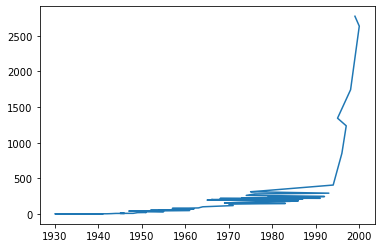

In [43]:
ufo.year.value_counts().plot()

<AxesSubplot:>

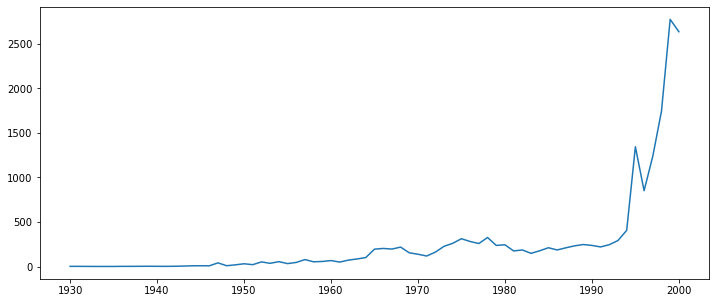

In [44]:
ufo.year.value_counts().sort_index().plot(figsize=(12,5))

**EXTRA:** Indexing by timestamps

Generally, it is useful to index data by timestamps (more on this in Part iv)

In [45]:
ufo.set_index('Time', inplace=True)
ufo

,City,Colors Reported,Shape Reported,State,year
Time,,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY,1930
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ,1930
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO,1931
1931-06-01 13:00:00,Abilene,NaN,DISK,KS,1931
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY,1933
...,...,...,...,...,...
2000-12-31 23:00:00,Grant Park,NaN,TRIANGLE,IL,2000
2000-12-31 23:00:00,Spirit Lake,NaN,DISK,IA,2000
2000-12-31 23:45:00,Eagle River,NaN,NaN,WI,2000


Interestingly, you don't need the `.dt` attribute to access Pandas' timestamp Series attributes

In [46]:
ufo.index.year

Int64Index([1930, 1930, 1931, 1931, 1933, 1934, 1935, 1936, 1936, 1937,
            ...
            2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],
           dtype='int64', name='Time', length=18241)

In [47]:
ufo.index.hour

Int64Index([22, 20, 14, 13, 19, 15,  0,  0, 17,  0,
            ...
            20, 20, 21, 22, 23, 23, 23, 23, 23, 23],
           dtype='int64', name='Time', length=18241)

## 3. Using string methods in pandas

In [48]:
# read a dataset of Chipotle orders into a DataFrame
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/chipotleorders.csv'
orders = pd.read_csv(url)
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [49]:
# normal way to access string methods in Python
'hello'.upper()

'HELLO'

In [50]:
'hello'.islower()

True

In [51]:
'hello'.isupper()

False

In [52]:
'hello, my name is Javier'.split(',')

['hello', ' my name is Javier']

In [53]:
'hello, my name is Javier'.split(' ')

['hello,', 'my', 'name', 'is', 'Javier']

In [54]:
'hello, my name is Javier'.replace('Javier','Bob')

'hello, my name is Bob'

String methods for pandas Series are accessed via 'str'

In [55]:
orders.item_name

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

In [56]:
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

In [57]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken')

0       False
1       False
2       False
3       False
4        True
        ...  
4617    False
4618    False
4619     True
4620     True
4621     True
Name: item_name, Length: 4622, dtype: bool

In [58]:
# use the boolean Series to filter the DataFrame
orders.loc[orders.item_name.str.contains('Chicken'),:] # rows that have chicken in the item_name

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
...,...,...,...,...,...
4604,1828,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [59]:
# string methods can be chained together
orders.choice_description.str.replace('[', '').str.replace(']', '') # remove square brackets 

C:\Users\javier.perez-alvaro\AppData\Local\Temp\ipykernel_5636\3566646402.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders.choice_description.str.replace('[', '').str.replace(']', '') # remove square brackets


0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object